In [1]:
# Importación de librerías analíticas y visuales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Configuración estética profesional
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Carga del Dataset Maestro Limpio
df = pd.read_csv('../data/procesada/master_dataset.csv')

# Asegurar tipos de datos (por si el CSV perdió el formato)
# Convertimos Fecha a datetime
df['Fecha_consulta'] = pd.to_datetime(df['Fecha_consulta'])

print(f"Dataset cargado para análisis: {df.shape[0]} registros.")
print(f"Columnas disponibles: {df.columns.tolist()}")

Dataset cargado para análisis: 1140532 registros.
Columnas disponibles: ['ID_Cuenta', 'Fecha_consulta', 'Tipo_consulta', 'Tipo_persona', 'Departamento', 'Tiene_plan_avanzado', 'Tipo_Plan', 'Es_moroso', 'Tiene_plus', 'Ha_caido_mora', 'Correo', 'usa_app', 'Forma_pago', 'Monto_adeudado', 'Edad', 'Estrato', 'Motivo_llamada', 'Duracion_llamada', 'Tiempo_en_espera', 'Transferencia_llamada', 'primera_llamada', 'Antiguedad', 'Recomienda_marca', 'y']


In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


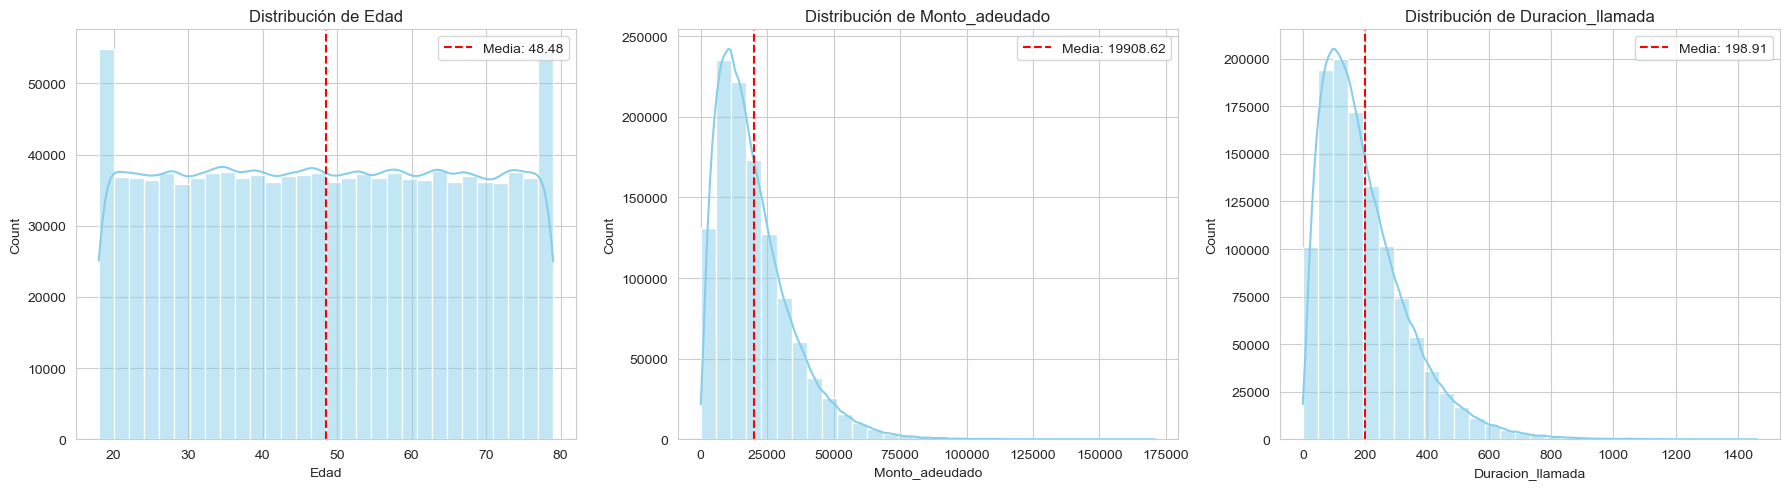


ESTADÍSTICAS DESCRIPTIVAS (NUMÉRICAS)
                      count     mean      std   min      50%       max
Edad             1140532.00    48.48    17.87 18.00    48.00     79.00
Monto_adeudado   1140532.00 19908.62 14140.81 30.16 16637.44 170987.69
Duracion_llamada 1140532.00   198.91   141.06  0.16   166.37   1463.23


In [3]:
vars_num = ['Edad', 'Monto_adeudado', 'Duracion_llamada']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, var in enumerate(vars_num):
    if var in df.columns:
        sns.histplot(df[var], kde=True, bins=30, ax=axes[i], color='skyblue')
        axes[i].set_title(f'Distribución de {var}')
        
        # Añadir línea de promedio
        media = df[var].mean()
        axes[i].axvline(media, color='red', linestyle='--', label=f'Media: {media:.2f}')
        axes[i].legend()

plt.tight_layout()
plt.show()

# --- IMPRESIÓN DE RESULTADOS ---
print("\n" + "="*40)
print("ESTADÍSTICAS DESCRIPTIVAS (NUMÉRICAS)")
print("="*40)
print(df[vars_num].describe().T[['count', 'mean', 'std', 'min', '50%', 'max']])

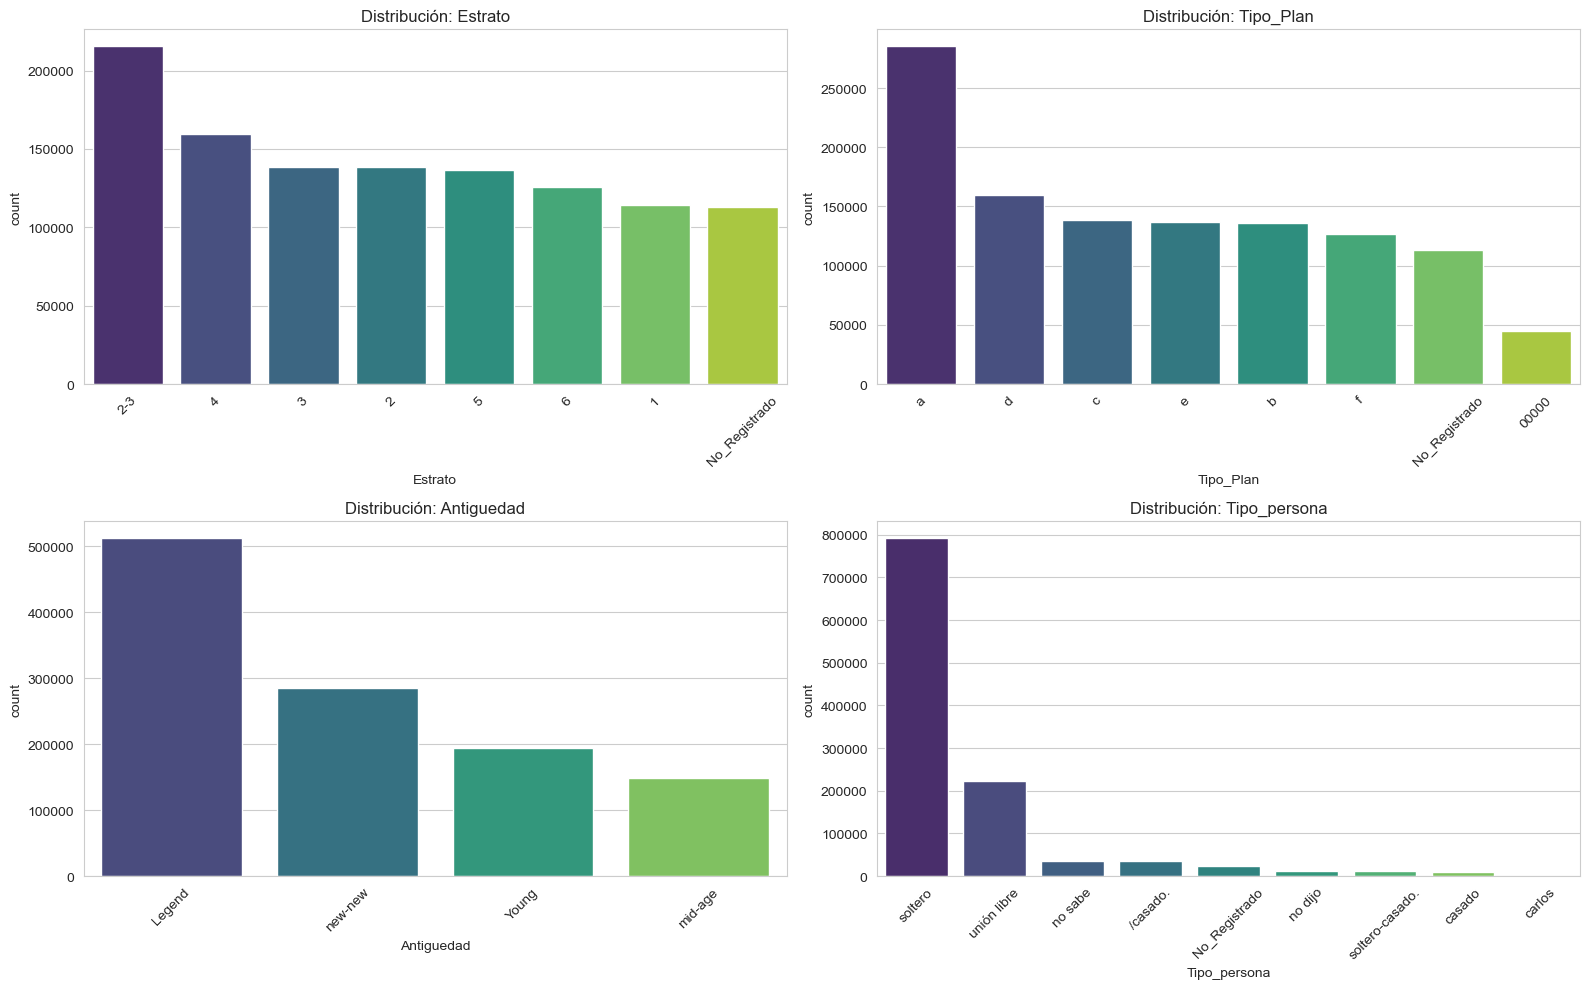


FRECUENCIAS DE CATEGORÍAS (TOP 5)

--- Variable: Estrato ---
Estrato
2-3   18.89%
4     13.99%
3     12.14%
2     12.12%
5     11.96%

--- Variable: Tipo_Plan ---
Tipo_Plan
a   25.00%
d   13.97%
c   12.18%
e   11.99%
b   11.94%

--- Variable: Antiguedad ---
Antiguedad
Legend    44.91%
new-new   25.03%
Young     17.01%
mid-age   13.06%

--- Variable: Tipo_persona ---
Tipo_persona
soltero         69.43%
unión libre     19.61%
no sabe          3.06%
/casado.         3.00%
No_Registrado    2.01%


In [4]:
vars_cat = ['Estrato', 'Tipo_Plan', 'Antiguedad', 'Tipo_persona']
# Filtramos solo las que existen
vars_cat = [v for v in vars_cat if v in df.columns]

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

for i, var in enumerate(vars_cat):
    # Gráfico
    sns.countplot(x=var, data=df, ax=axes[i], palette='viridis', order=df[var].value_counts().index)
    axes[i].set_title(f'Distribución: {var}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# --- IMPRESIÓN DE RESULTADOS ---
print("\n" + "="*40)
print("FRECUENCIAS DE CATEGORÍAS (TOP 5)")
print("="*40)
for var in vars_cat:
    print(f"\n--- Variable: {var} ---")
    conteo = df[var].value_counts(normalize=True) * 100 # Porcentaje
    print(conteo.head(5).to_string(float_format="%.2f%%"))

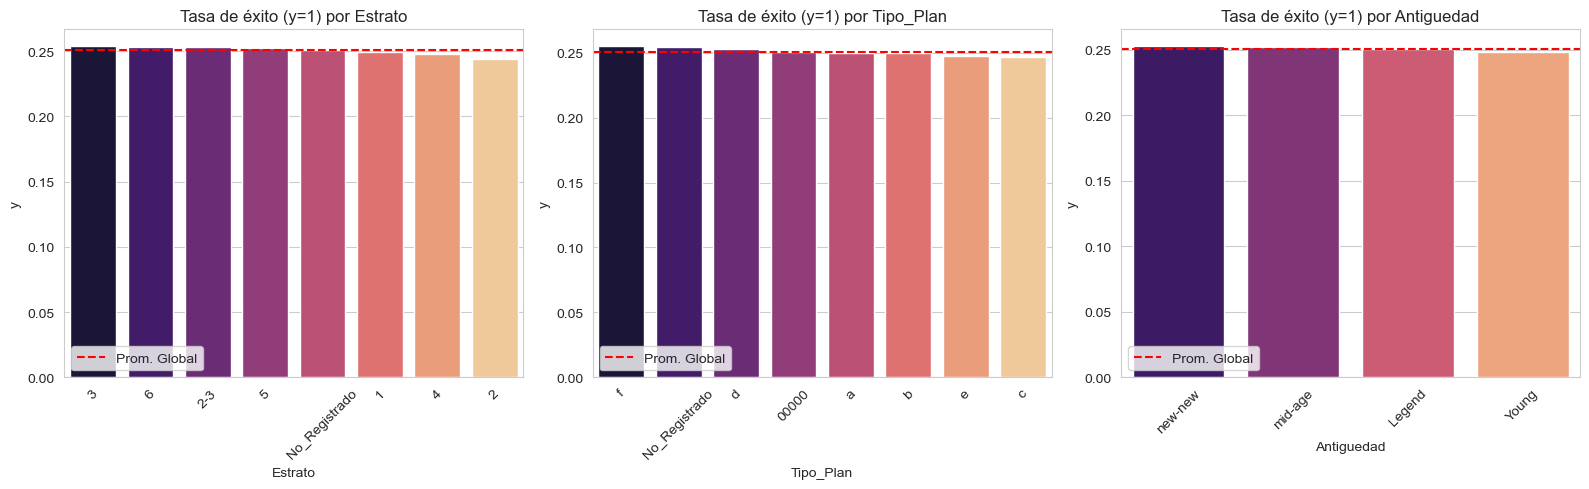


TASAS DE CONVERSIÓN (PROBABILIDAD DE Y=1)
Promedio Global del Dataset: 25.07%

--- Porcentaje de 'y=1' según Estrato ---
Estrato
3               25.40%
6               25.33%
2-3             25.30%
5               25.27%
No_Registrado   25.06%
1               24.91%
4               24.82%
2               24.41%

--- Porcentaje de 'y=1' según Tipo_Plan ---
Tipo_Plan
f               25.52%
No_Registrado   25.45%
d               25.28%
00000           25.06%
a               25.01%
b               24.98%
e               24.73%
c               24.69%

--- Porcentaje de 'y=1' según Antiguedad ---
Antiguedad
new-new   25.28%
mid-age   25.17%
Legend    25.03%
Young     24.81%

COMPARATIVA DE PROMEDIOS (CLASE 0 vs CLASE 1)
   Edad  Monto_adeudado  Duracion_llamada
y                                        
0 48.45        19928.08            199.01
1 48.55        19850.47            198.62


In [5]:
# A. Relación Categórica vs Target
target_col = 'y'
vars_analisis = ['Estrato', 'Tipo_Plan', 'Antiguedad']

plt.figure(figsize=(16, 5))
for i, var in enumerate(vars_analisis):
    if var in df.columns:
        plt.subplot(1, 3, i+1)
        # Calculamos la media de 'y' (que es la tasa de conversión)
        tasa = df.groupby(var)[target_col].mean().sort_values(ascending=False).reset_index()
        
        sns.barplot(x=var, y=target_col, data=tasa, palette='magma')
        plt.axhline(df[target_col].mean(), color='red', linestyle='--', label='Prom. Global')
        plt.title(f'Tasa de éxito (y=1) por {var}')
        plt.xticks(rotation=45)
        plt.legend()

plt.tight_layout()
plt.show()

# --- IMPRESIÓN DE RESULTADOS ---
print("\n" + "="*40)
print("TASAS DE CONVERSIÓN (PROBABILIDAD DE Y=1)")
print("="*40)
print(f"Promedio Global del Dataset: {df[target_col].mean()*100:.2f}%")

for var in vars_analisis:
    if var in df.columns:
        print(f"\n--- Porcentaje de 'y=1' según {var} ---")
        # Agrupamos y mostramos los valores más altos
        grupo = df.groupby(var)[target_col].mean() * 100
        print(grupo.sort_values(ascending=False).to_string(float_format="%.2f%%"))

# B. Relación Numérica vs Target
print("\n" + "="*40)
print("COMPARATIVA DE PROMEDIOS (CLASE 0 vs CLASE 1)")
print("="*40)
print(df.groupby('y')[['Edad', 'Monto_adeudado', 'Duracion_llamada']].mean())

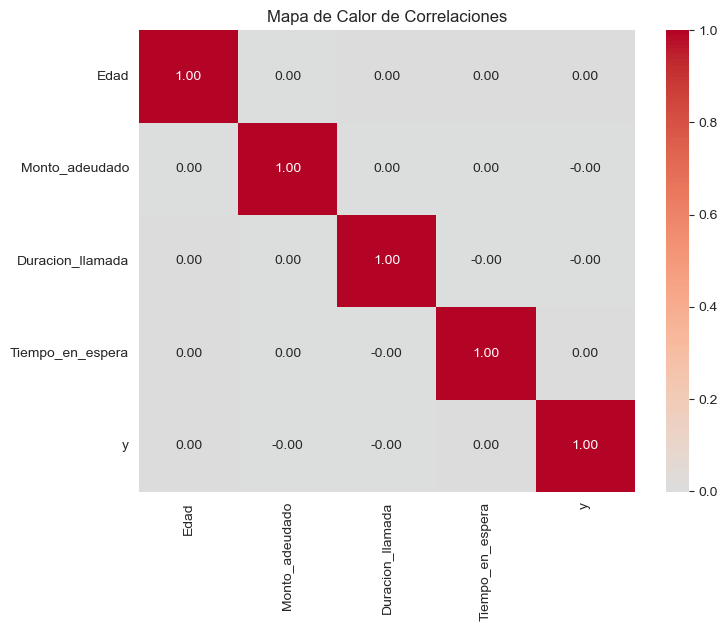


RANKING DE CORRELACIÓN CON 'Y'
y                   1.00
Edad                0.00
Tiempo_en_espera    0.00
Duracion_llamada   -0.00
Monto_adeudado     -0.00
Name: y, dtype: float64

PRUEBA DE HIPÓTESIS: DEUDA vs TARGET
Promedio Deuda (Clase 0): $19,928.08
Promedio Deuda (Clase 1): $19,850.47
Estadístico T: 2.5505
P-Valor: 1.0757e-02
>> CONCLUSIÓN: La diferencia de deuda es SIGNIFICATIVA. Es una variable predictora clave.


In [6]:
# 1. Matriz de Correlación
# Seleccionamos solo numéricas
cols_corr = ['Edad', 'Monto_adeudado', 'Duracion_llamada', 'Tiempo_en_espera', 'y']
cols_corr = [c for c in cols_corr if c in df.columns]

corr_matrix = df[cols_corr].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Mapa de Calor de Correlaciones')
plt.show()

# --- IMPRESIÓN DE RESULTADOS ---
print("\n" + "="*40)
print("RANKING DE CORRELACIÓN CON 'Y'")
print("="*40)
print(corr_matrix['y'].sort_values(ascending=False))

# 2. Prueba de Hipótesis
print("\n" + "="*40)
print("PRUEBA DE HIPÓTESIS: DEUDA vs TARGET")
print("="*40)

g0 = df[df['y']==0]['Monto_adeudado']
g1 = df[df['y']==1]['Monto_adeudado']

t_stat, p_val = stats.ttest_ind(g0, g1, equal_var=False)

print(f"Promedio Deuda (Clase 0): ${g0.mean():,.2f}")
print(f"Promedio Deuda (Clase 1): ${g1.mean():,.2f}")
print(f"Estadístico T: {t_stat:.4f}")
print(f"P-Valor: {p_val:.4e}")

if p_val < 0.05:
    print(">> CONCLUSIÓN: La diferencia de deuda es SIGNIFICATIVA. Es una variable predictora clave.")
else:
    print(">> CONCLUSIÓN: No hay diferencia significativa en la deuda.")